In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)


angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [10]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\Prakash\AppData\Local\Programs\Python\Python310\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\Prakash\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 400s 2s/step - accuracy: 0.2363 - loss: 1.8380 - val_accuracy: 0.2579 - val_loss: 1.7945
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.2434 - loss: 1.8046 - val_accuracy: 0.2958 - val_loss: 1.7156
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 340s 2s/step - accuracy: 0.2877 - loss: 1.7254 - val_accuracy: 0.3757 - val_loss: 1.5776
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step - accuracy: 0.3825 - loss: 1.5662 - val_accuracy: 0.4673 - val_loss: 1.4247
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 367s 2s/step - accuracy: 0.4296 - loss: 1.4718 - val_accuracy: 0.4867 - val_loss: 1.3228
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 361s 2s/step - accuracy: 0.4503 - loss: 1.4245 - val_accuracy: 0.5061 - val_loss: 1.2903
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.4764 - loss: 1.3773 - val_accuracy: 0.5109 - val_loss: 1.2640
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - accuracy: 0.4776 - loss: 1.3537 - 

In [26]:
model.save("facial_emotion_detector.keras")

In [27]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [28]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [29]:
from keras.preprocessing.image import load_img, img_to_array

image = 'images/train/sad/42.jpg'
print("Original image is of sad")
img = load_img(image, color_mode="grayscale")  
img = img_to_array(img)
img = img.reshape(1, img.shape[0], img.shape[1], 1) 
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)


Original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Model prediction is: sad


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

Original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Model prediction is: sad


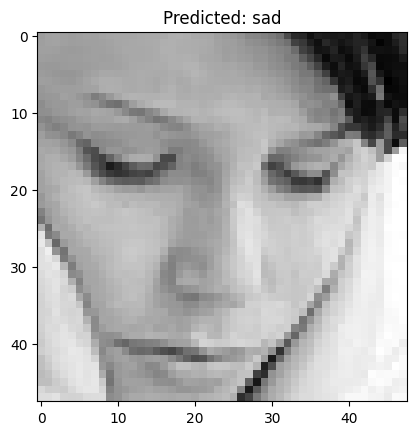

In [34]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
def ef(image):
    img = load_img(image, color_mode="grayscale")
    feature = img_to_array(img)
    feature = feature.reshape(1, 48, 48, 1)  
    feature = feature / 255.0 
    return feature
image = 'images/train/sad/42.jpg'
print("Original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f"Predicted: {pred_label}")
plt.show()


Original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Model prediction is: sad


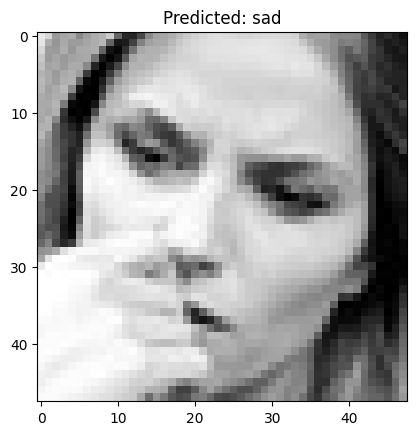

In [36]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
def ef(image):
    img = load_img(image, color_mode="grayscale")
    feature = img_to_array(img)
    feature = feature.reshape(1, 48, 48, 1)  
    feature = feature / 255.0 
    return feature
image = 'images/train/fear/2.jpg'
print("Original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f"Predicted: {pred_label}")
plt.show()


Original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Model prediction is: disgust


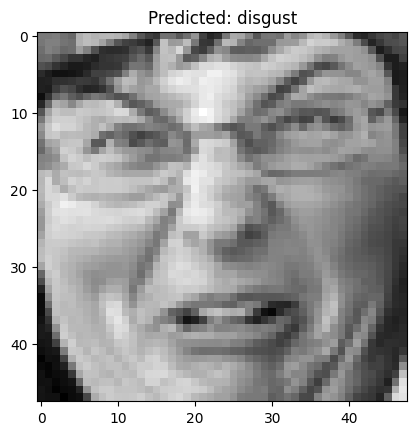

In [42]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
def ef(image):
    img = load_img(image, color_mode="grayscale")
    feature = img_to_array(img)
    feature = feature.reshape(1, 48, 48, 1)  
    feature = feature / 255.0 
    return feature
image = 'images/train/disgust/299.jpg'
print("Original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f"Predicted: {pred_label}")
plt.show()


Original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Model prediction is: happy


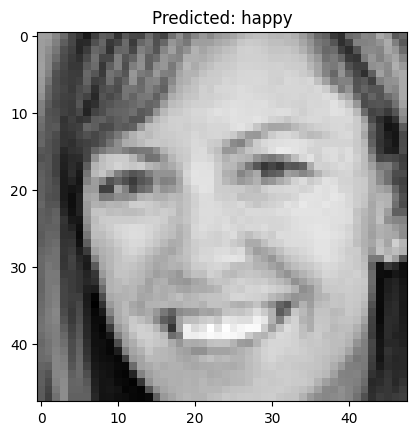

In [43]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
def ef(image):
    img = load_img(image, color_mode="grayscale")
    feature = img_to_array(img)
    feature = feature.reshape(1, 48, 48, 1)  
    feature = feature / 255.0 
    return feature
image = 'images/train/happy/46.jpg'
print("Original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f"Predicted: {pred_label}")
plt.show()


Original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Model prediction is: surprise


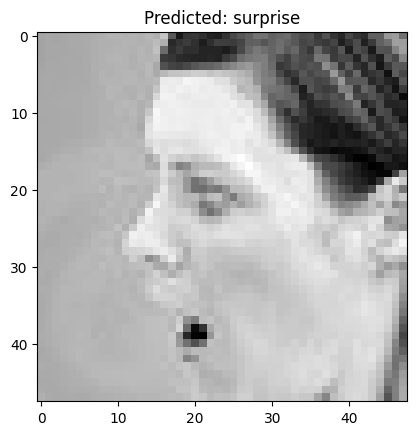

In [44]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
def ef(image):
    img = load_img(image, color_mode="grayscale")
    feature = img_to_array(img)
    feature = feature.reshape(1, 48, 48, 1)  
    feature = feature / 255.0 
    return feature
image = 'images/train/surprise/128.jpg'
print("Original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Model prediction is:", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f"Predicted: {pred_label}")
plt.show()
